In [1]:
#Initializing
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statistics

#import warnings filter - ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#Loading Working Data - https://www.kaggle.com/ronitf/heart-disease-uci
df = pd.read_csv('/Users/Kevin/Files/Thinkful/Data Files/heart.csv')

#Loading Raw Unformatted Data from Source- http://archive.ics.uci.edu/ml/datasets/Heart+Disease
raw_df = pd.read_csv("/Users/Kevin/Files/Thinkful/Data Files/processed.cleveland.data")

***
# Topic 

#### Can we build a model that predicts whether a future patient will have heart disease?

#### What characteristics make it more likely to have heart disease?

*** 
# Understanding the Data

> This dataset contains patient information with different medical characteristics. The origin of the dataset comes from UCI's Machine Learning Repository, with the patient data coming from Cleveland Clinic Foundation. The focus of this dataset will be the target variable, which denotes whether or not the patient has heart disease. 

In [2]:
#looking at columns types and size of file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


> In this dataset we have 14 features and 303 entries. 

> Some variables are categorical variables but are labeled as int64 data types. We will look into fixing this issue later on. 

## Variable List:



|Variable|Full Name|Decode|Description|Unit|
|--------|---------|----|------|-----------|
|age     |Age|Continuous Variable|The patient's age|Years|
|sex     |Sex|0 = Female<br>1 = Male|The patient's sex|&nbsp;|
|cp      |Chest Pain Type|0 = Asymptomatic<br>1 = Atypical angina<br>2 = Non-anginal pain<br>3 = Typical angina|The chest pain experienced|&nbsp;|
|trestbps|Resting Blood Pressure|Continuous Variable|The patient's resting blood pressure|mm Hg|
|chol    |Serum Cholestoral|Continuous Variable|The patient's cholesterol measurement|mg/dl|
|fbs     |Fasting Blood Sugar|0 = False<br>1 = True|If the patient's fasting blood sugar is greater than 120 mg/dl|&nbsp;|
|restecg |Resting Electrocardiographic Results|0 = Showing left ventricular hypertrophy<br>1 = Normal<br>2 = Having ST-T wave abnormality|The patient's resting ecg measurement|&nbsp;|
|thalach |Maximum Heart Rate Achieved|Continuous Variable|The patient's maxiumum heart rate achieved|&nbsp;|
|exang   |Exercise Induced Angina|0 = No<br>1 = Yes|If the patient had angina induced by exercise|&nbsp;|
|oldpeak |ST depression|Continuous Variable|ST depression induced by exercise relative to rest (ST relates to positions on the ECG plot)|&nbsp;|
|slope   |ST Slope|0 = Downward sloping<br>1 = Flat<br>2 = Upward sloping<br>|The slope of the peak exercise ST segment|&nbsp;|
|ca      |Number of Major Vessels|0-4|The patient's number of major vessels colored by flourosopy|&nbsp;|
|thal    |Thalassemia|1 = Fixed defect<br>2 = Normal<br>3 = Reversable defect|A blood disorder|&nbsp;|
|target  |Has Heart Disease|0 = Yes<br>1 = No|Angiographic disease status. Criteria: more than 50% diameter narrowing|&nbsp;|


***
# Data Cleaning

In [3]:
#renaming columns to make it easier to read
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
              'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 
              'num_major_vessels', 'thalassemia', 'target']

raw_df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar',
              'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 'st_depression', 'st_slope', 
              'num_major_vessels', 'thalassemia', 'target']

In [4]:
#Checking if dataset contains null values
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [5]:
#Finding number of unique values within the column to see if we have the right amount of decodes
for i in df.columns:
    print(i)
    print(df[i].nunique())

age
41
sex
2
chest_pain_type
4
resting_blood_pressure
49
cholesterol
152
fasting_blood_sugar
2
rest_ecg
3
max_heart_rate_achieved
91
exercise_induced_angina
2
st_depression
40
st_slope
3
num_major_vessels
5
thalassemia
4
target
2


In [6]:
#Finding unique values within each column to make sure the decode matches
for i in df.columns:
    print(i)
    print(df[i].unique())

age
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
[1 0]
chest_pain_type
[3 2 1 0]
resting_blood_pressure
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
cholesterol
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 16

> The decode on the source website lists the variable 'Thalassemia' with the decodes of 3, 6, 7; however the listed values in the dataset are 0, 1, 2, 3, 4. We will compare the working dataset to the raw dataset to investigate the correct decode.  

> We will also investigate the 'target' variable since the raw data distinguishes the patients having heart disease to be 1,2,3,4 values and not having heart disease to be 0, but the working data only contains 0 or 1 for the target variable. 

> We should also double check the other categorical variables to make sure we decode them correctly. 

In [7]:
#function to plot counts of values

def plot_val_counts(dataframe_1, data_name_1, var_1, dataframe_2, data_name_2, var_2):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1, 2, 1)
    plt.title("Count of {} in {} dataframe".format(var_1, data_name_1))
    ax = sns.countplot(dataframe_1[var_1], 
    order = dataframe_1[var_1].value_counts().index)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, 
                color='black', ha='center', va='bottom')
    
    plt.subplot(1, 2, 2)
    plt.title("Count of {} in {} dataframe".format(var_2, data_name_2))
    ax = sns.countplot(dataframe_2[var_2], 
    order = dataframe_2[var_2].value_counts().index)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=12, 
                color='black', ha='center', va='bottom')

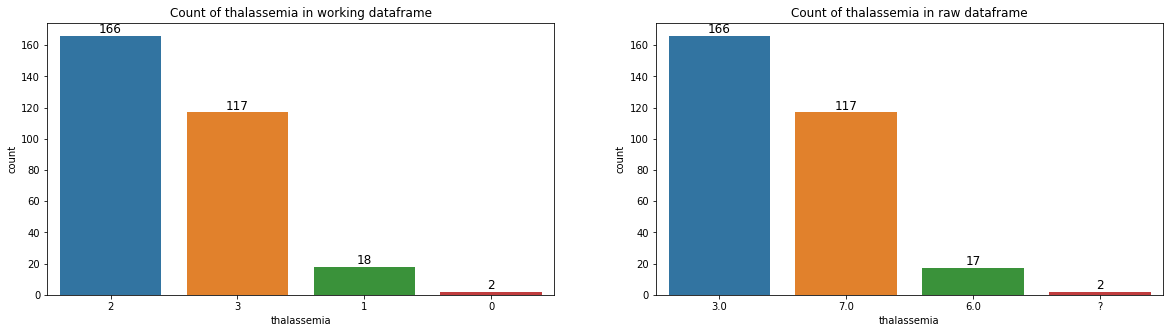

In [8]:
plot_val_counts(df,'working','thalassemia', raw_df, 'raw', 'thalassemia')

> Below is the correct decode for thalassemia

|Raw Value|Decode|Working Value|
|---------|------|-------------|
|3|Normal|2|
|6|Fixed Defect|1|
|7|Reversible Defect|3|


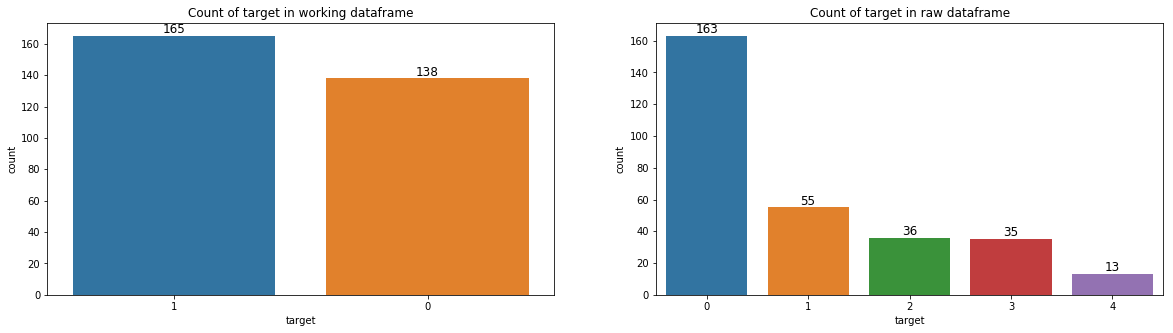

In [9]:
plot_val_counts(df,'working','target', raw_df, 'raw', 'target')

> We are told that in the raw data, 0 means there is no presence of heart disease and values 1, 2, 3, & 4 contains heart disease. Adding up the 1-4 values we get 139 counts, which is very close to the 0 values in the working dataset. Knowing this we can now determine that the 0 values in the working dataset means the patient has heart disease and the 1 value in the working dataset means that the patient does not have heart disease. 


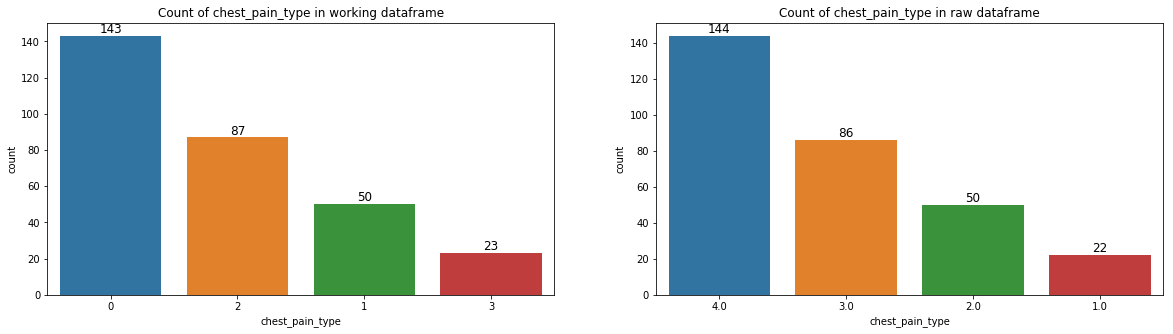

In [10]:
plot_val_counts(df,'working','chest_pain_type', raw_df, 'raw', 'chest_pain_type')

> Below is the correct decode for chest_pain_type

|Raw Value|Decode|Working Value|
|---------|------|-------------|
|Value 1|Typical Angina|3|
|Value 2|Atypical Angina|1|
|Value 3|Non-anginal pain|2|
|Value 4|Asymptomatic|0|

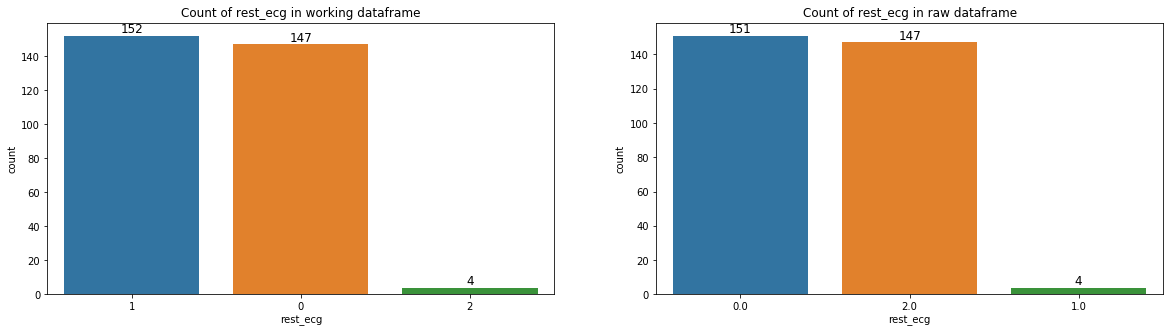

In [11]:
plot_val_counts(df,'working','rest_ecg', raw_df, 'raw', 'rest_ecg')

> Below is the correct decode for rest_ecg

|Raw Value|Decode|Working Value|
|---------|------|-------------|
|Value 0|Normal|1|
|Value 1|Having ST-T wave abnormality|2|
|Value 2|Showing left ventricular hypertrophy|0|

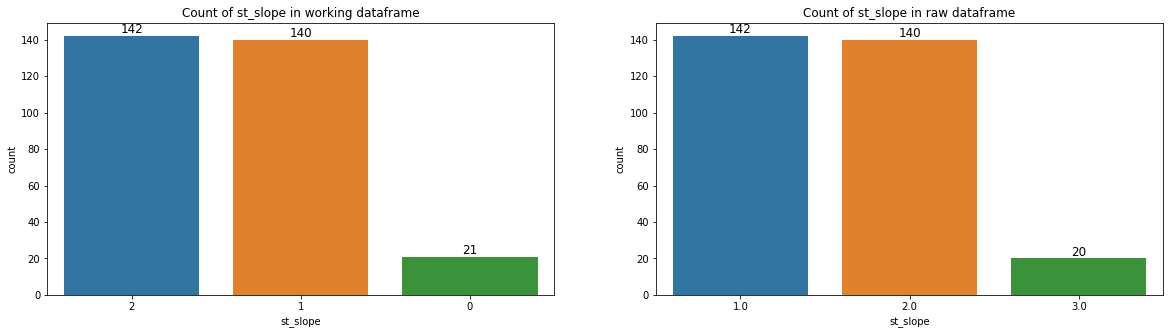

In [12]:
plot_val_counts(df,'working','st_slope', raw_df, 'raw', 'st_slope')

> Below is the correct decode for st_slope

|Raw Value|Decode|Working Value|
|---------|------|-------------|
|Value 1|Up-sloping|2|
|Value 2|Flat|1|
|Value 3|Down-sloping|0|

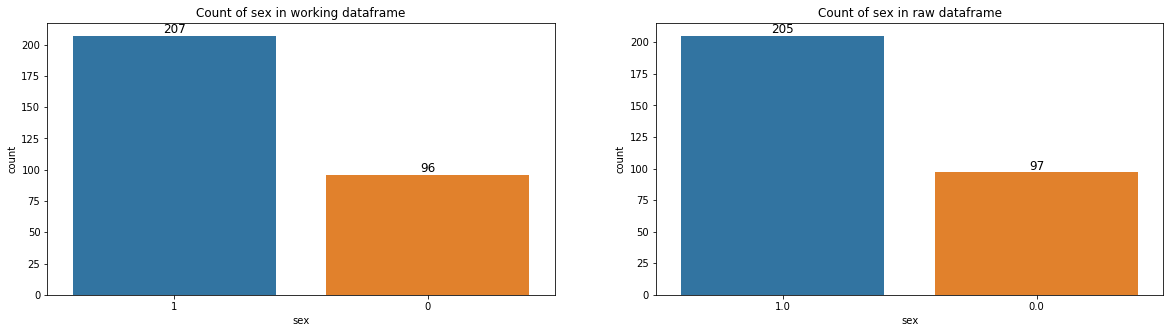

In [13]:
plot_val_counts(df,'working','sex', raw_df, 'raw', 'sex')

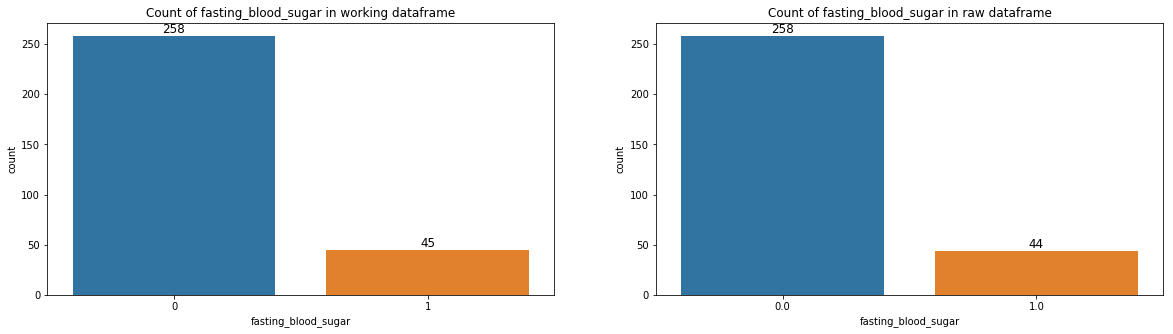

In [14]:
plot_val_counts(df,'working','fasting_blood_sugar', raw_df, 'raw', 'fasting_blood_sugar')

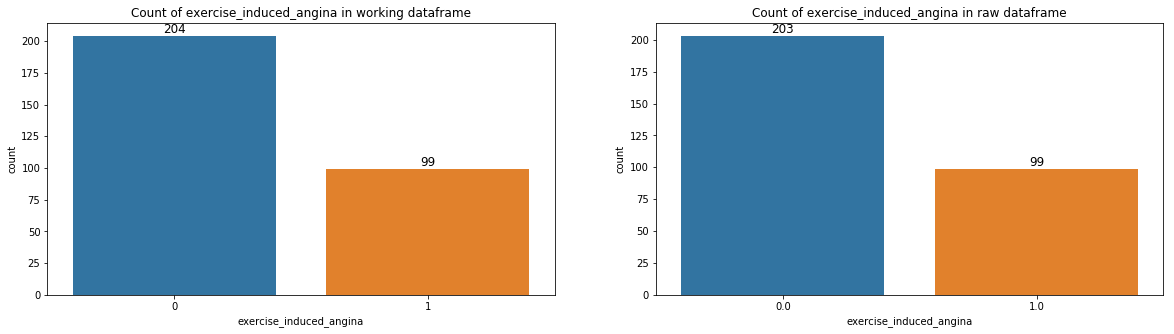

In [15]:
plot_val_counts(df,'working','exercise_induced_angina', raw_df, 'raw', 'exercise_induced_angina')

> For the categorical variables: sex, fasting_blood_sugar, & exercise_induced_angina the coding of the values are correct and no changes need to be done. 

In [16]:
#creating new dataframe that decodes all the codes and changes column type
df1 = df.copy()

d_sex = {0: "female", 1: "male"}
d_chest_pain_type = {0: "asymptomatic", 1: "atypical angina", 2:"non-anginal pain", 3:"typical angina"}
d_fasting_blood_sugar = {0: "lower than 120mg/ml", 1: "greater than 120mg/ml"}
d_rest_ecg = {0: "left ventricular hypertrophy", 1: "normal", 2:"ST-T wave abnormality"}
d_exercise_induced_angina = {0: "no", 1: "yes"}
d_st_slope = {0: "down-sloping", 1: "flat", 2:"up-sloping"}
d_thalassemia = {1: "fixed defect", 2: "normal", 3:"reversable defect"}
d_target = {0: "has heart disease", 1: "doesn't have heart disease"}

df1['sex'] = df1['sex'].map(d_sex) 
df1['chest_pain_type'] = df1['chest_pain_type'].map(d_chest_pain_type) 
df1['fasting_blood_sugar'] = df1['fasting_blood_sugar'].map(d_fasting_blood_sugar) 
df1['rest_ecg'] = df1['rest_ecg'].map(d_rest_ecg) 
df1['exercise_induced_angina'] = df1['exercise_induced_angina'].map(d_exercise_induced_angina) 
df1['st_slope'] = df1['st_slope'].map(d_st_slope) 
df1['thalassemia'] = df1['thalassemia'].map(d_thalassemia) 
#df1['target'] = df1['target'].map(d_target) 

In [17]:
#check
df1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,typical angina,145,233,greater than 120mg/ml,left ventricular hypertrophy,150,no,2.3,down-sloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,lower than 120mg/ml,normal,187,no,3.5,down-sloping,0,normal,1
2,41,female,atypical angina,130,204,lower than 120mg/ml,left ventricular hypertrophy,172,no,1.4,up-sloping,0,normal,1
3,56,male,atypical angina,120,236,lower than 120mg/ml,normal,178,no,0.8,up-sloping,0,normal,1
4,57,female,asymptomatic,120,354,lower than 120mg/ml,normal,163,yes,0.6,up-sloping,0,normal,1


In [18]:
#check
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                        303 non-null int64
sex                        303 non-null object
chest_pain_type            303 non-null object
resting_blood_pressure     303 non-null int64
cholesterol                303 non-null int64
fasting_blood_sugar        303 non-null object
rest_ecg                   303 non-null object
max_heart_rate_achieved    303 non-null int64
exercise_induced_angina    303 non-null object
st_depression              303 non-null float64
st_slope                   303 non-null object
num_major_vessels          303 non-null int64
thalassemia                301 non-null object
target                     303 non-null int64
dtypes: float64(1), int64(6), object(7)
memory usage: 33.2+ KB


> num_major_vessels should be an object 

In [19]:
df1.astype({'num_major_vessels': 'object'}).dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels           object
thalassemia                 object
target                       int64
dtype: object

***
# Analyzing the Variables

In [20]:
#function to plot continuous variables
def plot_cont_var(dataframe, var_1, var_2, x_name, y_name):

    plt.figure(figsize = (10, 5))
    plt.title("Boxplot of {} split by {}".format(var_1, var_2))
    ax = sns.boxplot(x = var_1, y = var_2, orient="h", data=dataframe)
    ax.set(ylabel = y_name, xlabel = x_name)
    plt.show()

#function to plot categorical variables
def plot_cat_var(dataframe, var_1, var_2, x_name):

    plt.figure(figsize = (10, 5))
    plt.title("Countplot of {} split by {}".format(var_1, var_2))
    ax = sns.countplot(x=var_1,hue=var_2, data=dataframe)
    ax.set(ylabel = 'Count', xlabel = x_name)
    plt.show()  

## Categorical Variables

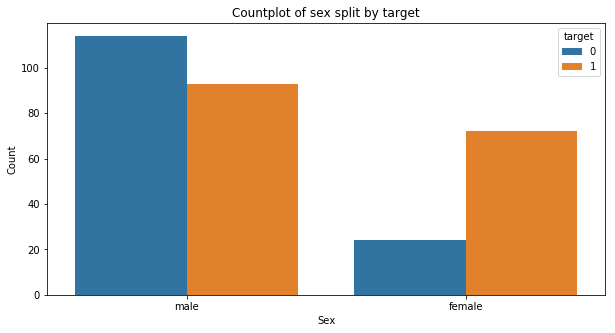

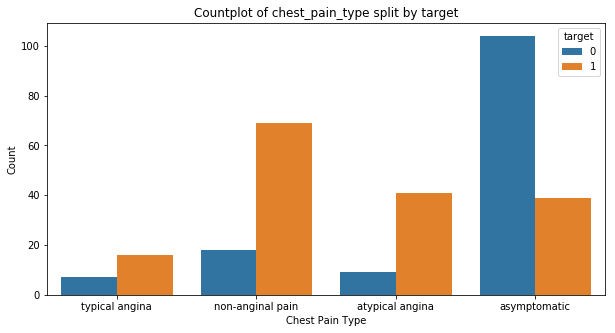

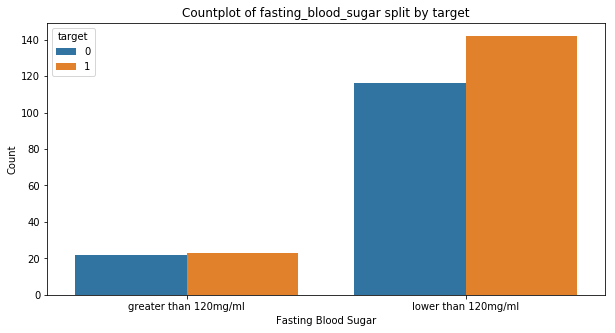

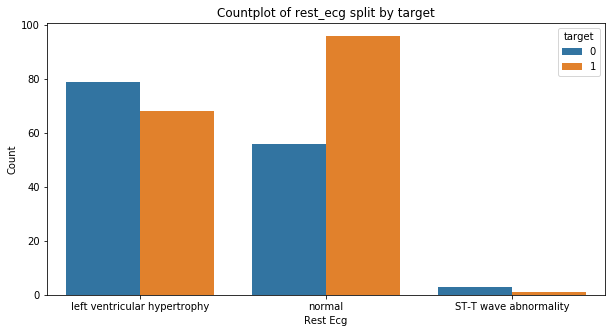

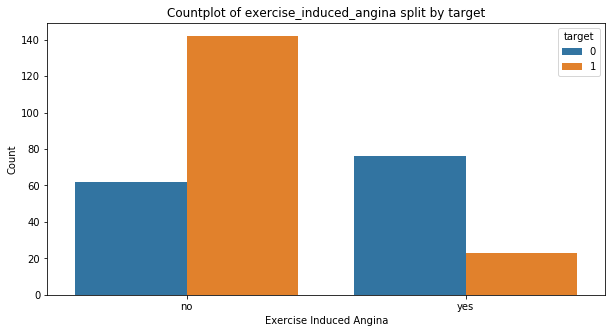

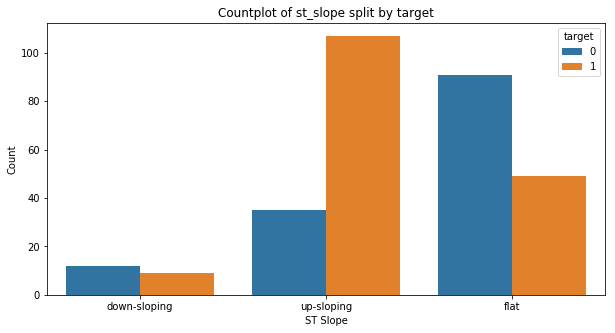

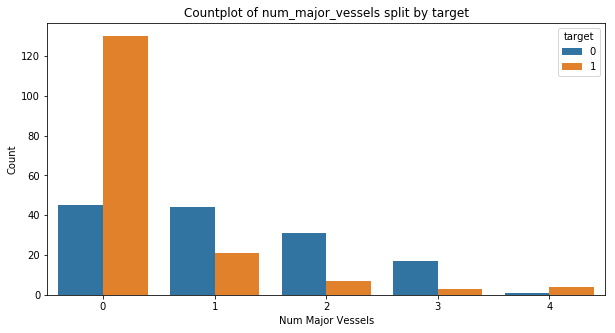

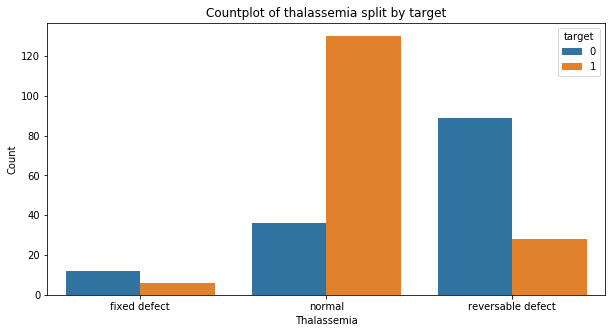

In [21]:
plot_cat_var(df1, 'sex', 'target', 'Sex')
plot_cat_var(df1, 'chest_pain_type', 'target', 'Chest Pain Type')
plot_cat_var(df1, 'fasting_blood_sugar', 'target', 'Fasting Blood Sugar')
plot_cat_var(df1, 'rest_ecg', 'target', 'Rest Ecg')
plot_cat_var(df1, 'exercise_induced_angina', 'target', 'Exercise Induced Angina')
plot_cat_var(df1, 'st_slope', 'target', 'ST Slope')
plot_cat_var(df1, 'num_major_vessels', 'target', 'Num Major Vessels')
plot_cat_var(df1, 'thalassemia', 'target', 'Thalassemia')

## Continuous Variables

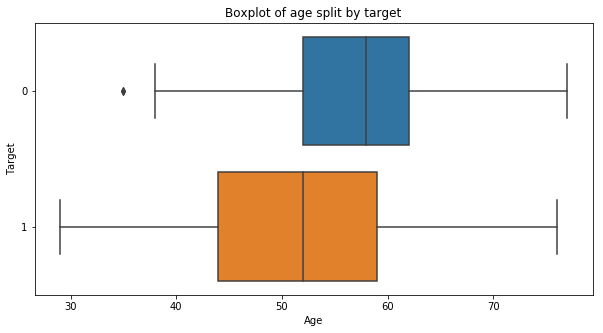

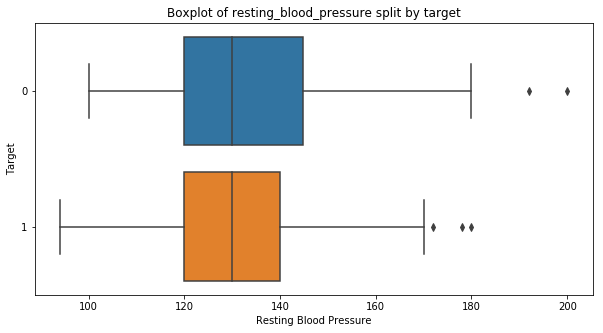

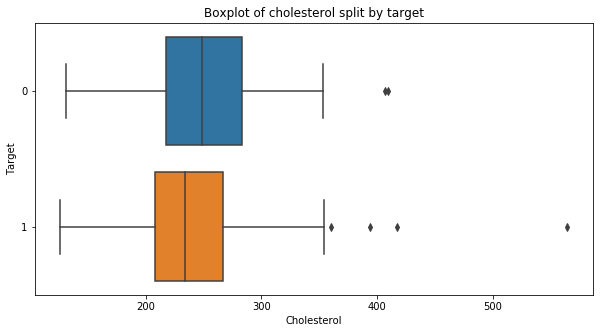

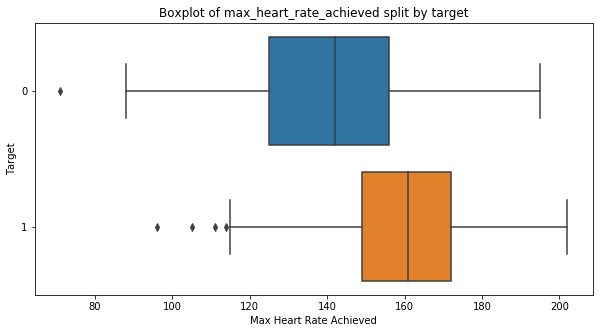

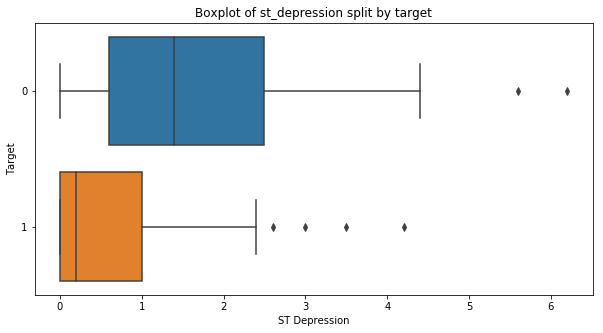

In [22]:
plot_cont_var(df1, 'age', 'target', 'Age', 'Target')
plot_cont_var(df1, 'resting_blood_pressure', 'target', 'Resting Blood Pressure', 'Target')
plot_cont_var(df1, 'cholesterol', 'target', 'Cholesterol', 'Target')
plot_cont_var(df1, 'max_heart_rate_achieved', 'target', 'Max Heart Rate Achieved', 'Target')
plot_cont_var(df1, 'st_depression', 'target', 'ST Depression', 'Target')

# Checking independence between the independent variables

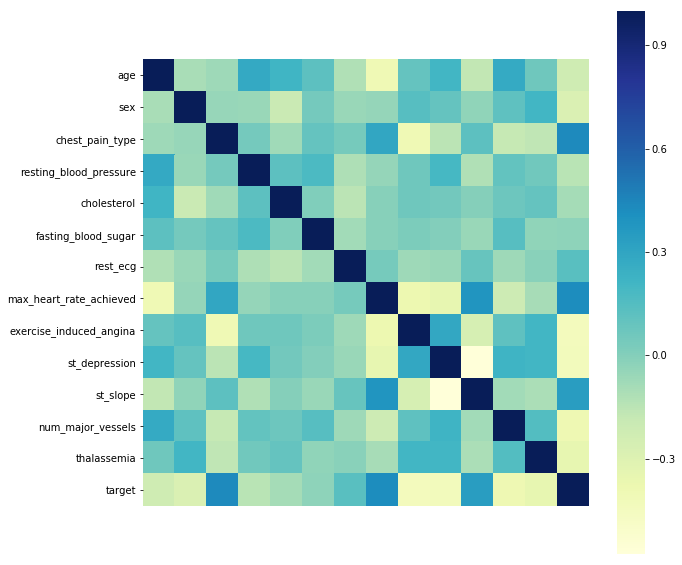

In [23]:
#Heatmap of correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square= True, fmt='.2f', xticklabels=False, cmap="YlGnBu")
plt.show()

#annot=True,

***
# Model Preprocessing

In [24]:
#creating new dataframe that houses the dummy variables - to be used in random forest model
df2 = pd.get_dummies(df1)

#check
df2.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_female,sex_male,chest_pain_type_asymptomatic,...,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_down-sloping,st_slope_flat,st_slope_up-sloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,0
2,41,130,204,172,1.4,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,0,1,0,...,0,1,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0


In [25]:
#Listing columns in df2 with dummy variables
for i in df2.columns:
    print(i)

age
resting_blood_pressure
cholesterol
max_heart_rate_achieved
st_depression
num_major_vessels
target
sex_female
sex_male
chest_pain_type_asymptomatic
chest_pain_type_atypical angina
chest_pain_type_non-anginal pain
chest_pain_type_typical angina
fasting_blood_sugar_greater than 120mg/ml
fasting_blood_sugar_lower than 120mg/ml
rest_ecg_ST-T wave abnormality
rest_ecg_left ventricular hypertrophy
rest_ecg_normal
exercise_induced_angina_no
exercise_induced_angina_yes
st_slope_down-sloping
st_slope_flat
st_slope_up-sloping
thalassemia_fixed defect
thalassemia_normal
thalassemia_reversable defect


In [26]:
#Creating variables
x = df2.drop('target', 1)
y = df2['target']

In [27]:
#Split dataset into training set and test set
from sklearn.model_selection import train_test_split

#80% training and 20% test - Also setting random state to make results reproducable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1221) 

***
# Random Forest Classifier

In [28]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.model_selection import GridSearchCV
# Perform Grid-Search to find best parmeters
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 500, 1000),
        },
    cv=5,  
    verbose=0, 
    n_jobs=-1)
    
grid_result = gsc.fit(x, y)
best_params = grid_result.best_params_

print(best_params)

{'max_depth': 3, 'n_estimators': 100}


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [30]:
# Model using grid search best paramters
rfc = RandomForestClassifier(max_depth=3, n_estimators=500, random_state = 99)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=99, verbose=0, warm_start=False)

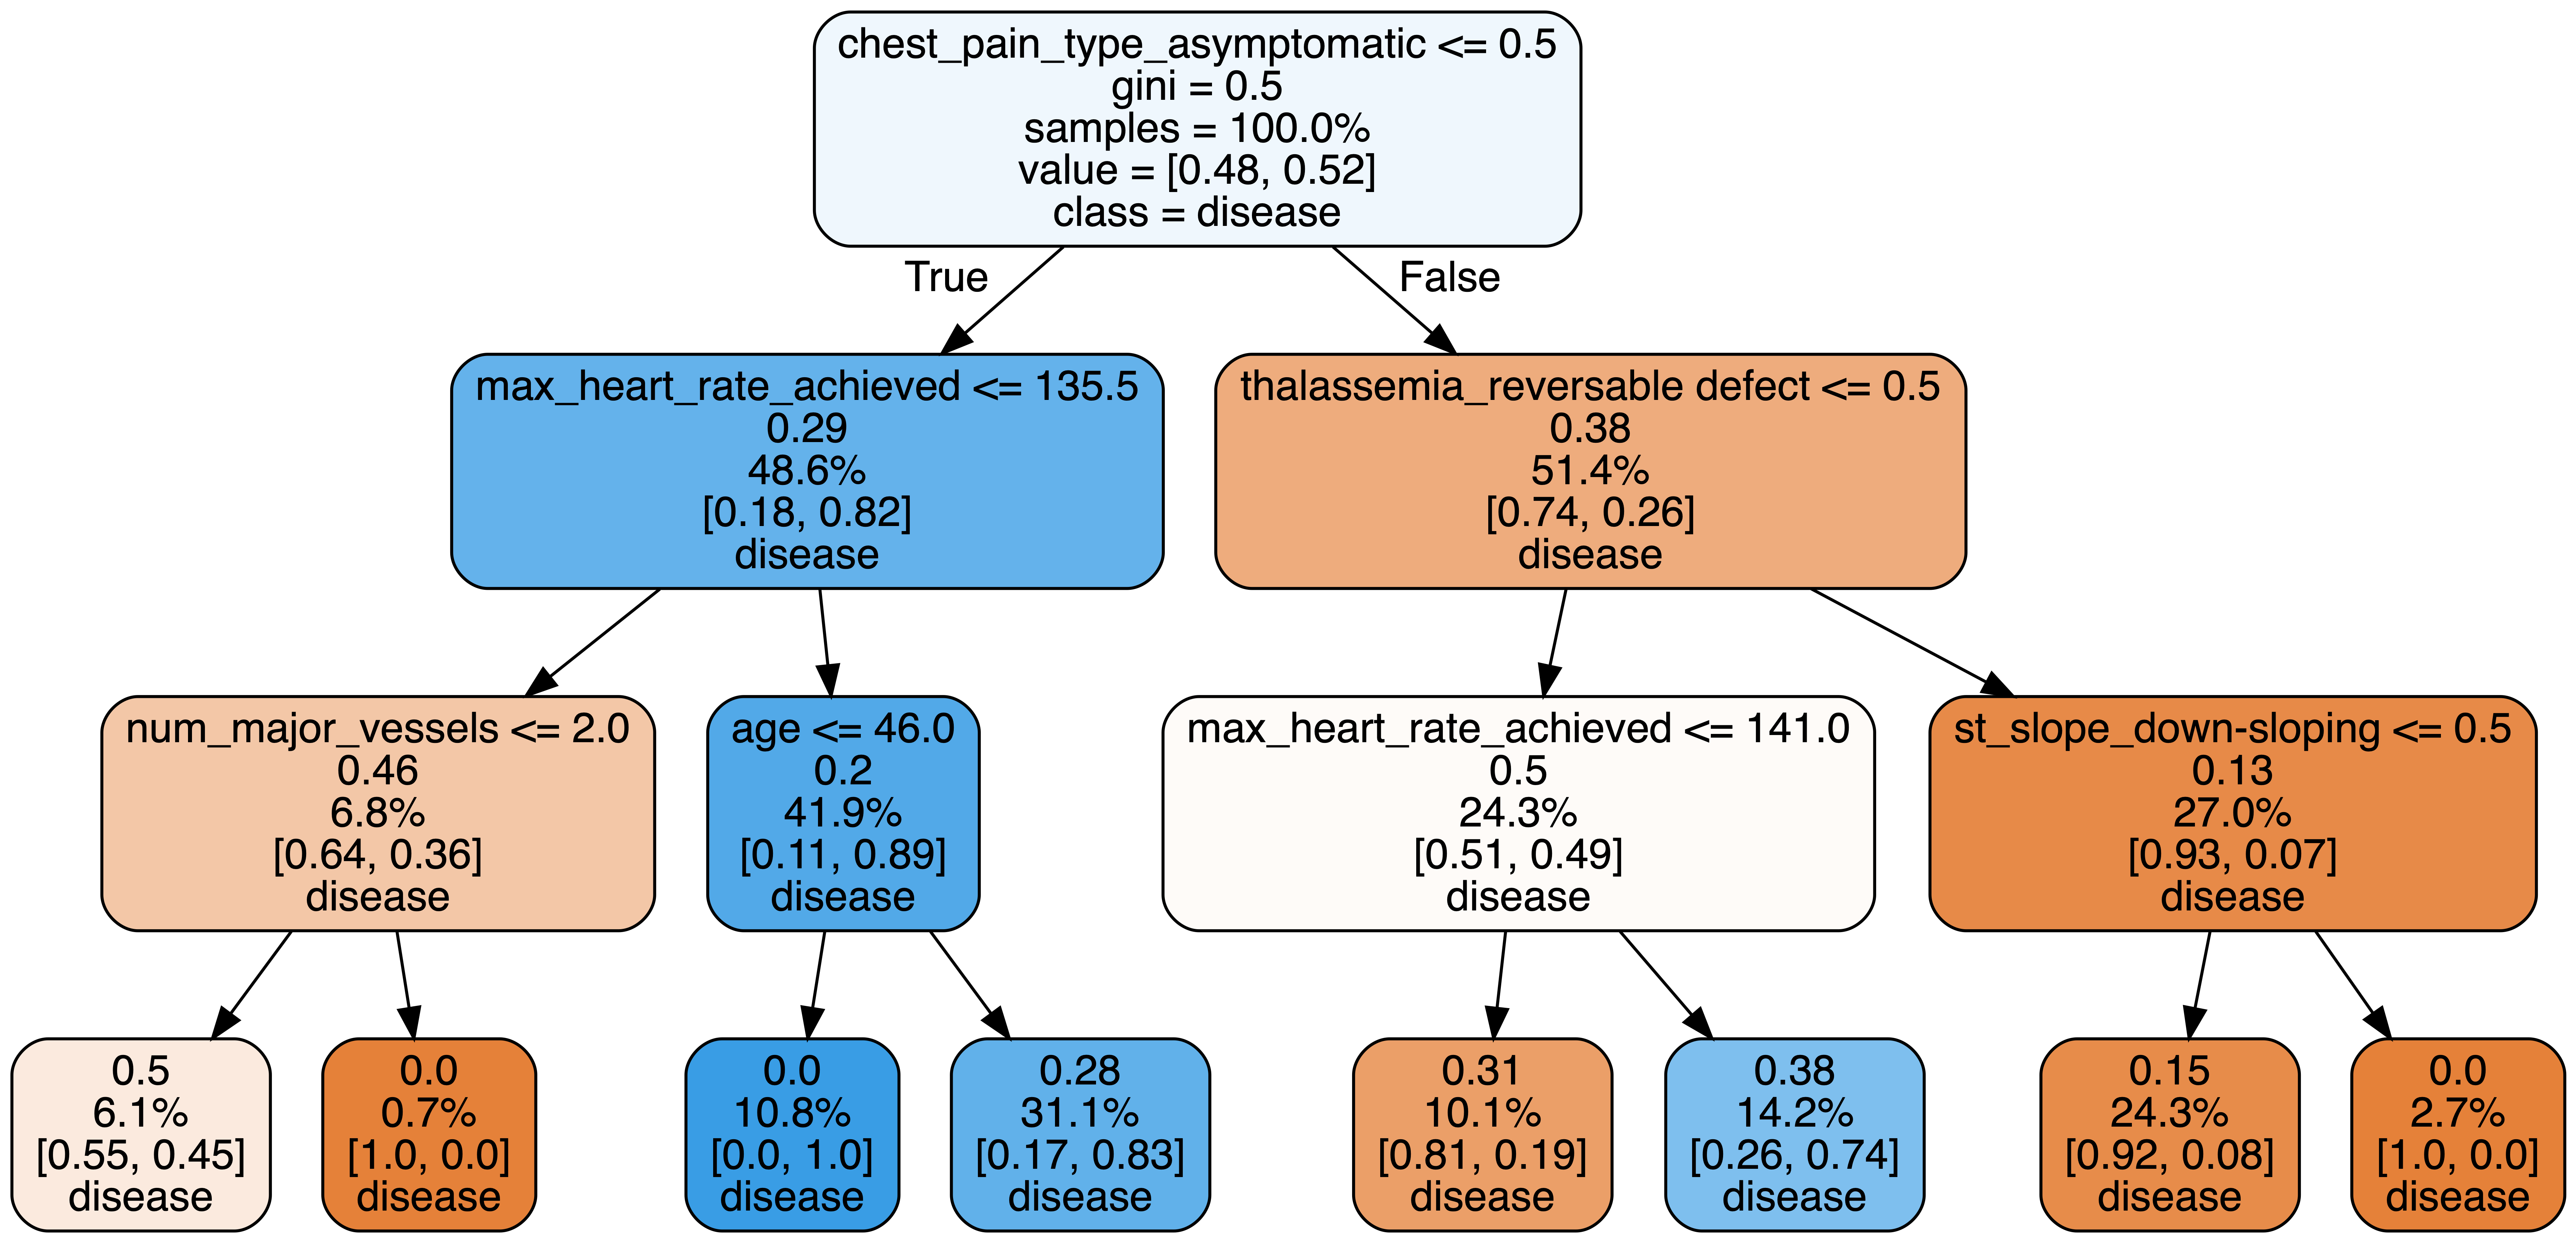

In [31]:
from sklearn.tree import export_graphviz #plot tree

estimator = rfc.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '1'] = 'no disease'
y_train_str[y_train_str == '0'] = 'disease'
y_train_str = y_train_str.values

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

###  Random Forest Classifier - Evaluation

In [32]:
test_score_rfc = rfc.score(x_test, y_test)
train_score_rfc = rfc.score(x_train, y_train)

print('Accuracy of random forest classifier on test set: {:.2f}'.format(test_score_rfc))
print('Accuracy of random forest classifier on training set: {:.2f}'.format(train_score_rfc))

Accuracy of random forest classifier on test set: 0.82
Accuracy of random forest classifier on training set: 0.90


In [33]:
from sklearn.metrics import confusion_matrix

y_pred_rfc = rfc.predict(x_test)

confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc, labels=[1,0])
print(confusion_matrix_rfc)

[[27  3]
 [ 8 23]]


In [34]:
#Calculating Sensitivity and Specificity 
sensitivity_rfc = confusion_matrix_rfc[1,1]/(confusion_matrix_rfc[1,1]+confusion_matrix_rfc[1,0])
print('Sensitivity : {:.2f}'.format(sensitivity_rfc))

specificity_rfc = confusion_matrix_rfc[0,0]/(confusion_matrix_rfc[0,0]+confusion_matrix_rfc[0,1])
print('Specificity : {:.2f}'.format(specificity_rfc))

Sensitivity : 0.74
Specificity : 0.90


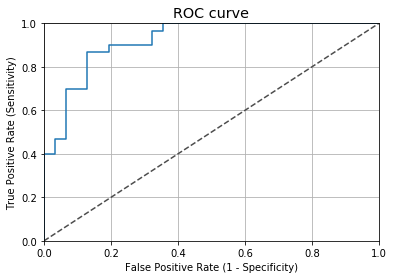

In [35]:
from sklearn.metrics import roc_curve

y_pred_prob_rfc = rfc.predict_proba(x_test)[:, 1]

fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_prob_rfc)

fig_rfc, ax = plt.subplots()
ax.plot(fpr_rfc, tpr_rfc)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [36]:
#Area Under the Curve - AUC
from sklearn.metrics import auc 

auc_rfc = auc(fpr_rfc, tpr_rfc)
print('AUC : {:.2f}'.format(auc_rfc))

AUC : 0.92


In [37]:
from sklearn.model_selection import cross_val_score

cvs_rfc = cross_val_score(rfc, x, y, cv=10)
cvs_rfc = ["%.2f"%i for i in cvs_rfc]
print('Cross Validation Score: {}'.format(cvs_rfc))

Cross Validation Score: ['0.90', '0.81', '0.87', '0.97', '0.87', '0.80', '0.83', '0.87', '0.76', '0.79']


In [38]:
from sklearn.metrics import classification_report

class_rep_rfc = classification_report(y_test, y_pred_rfc)

print(class_rep_rfc)

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

   micro avg       0.82      0.82      0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



***
# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

###  Logistic Regression - Evaluation

In [41]:
test_score_lr = lr.score(x_test, y_test)
train_score_lr = lr.score(x_train, y_train)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(test_score_lr))
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(train_score_lr))

Accuracy of logistic regression classifier on test set: 0.85
Accuracy of logistic regression classifier on training set: 0.85


In [42]:
from sklearn.metrics import confusion_matrix

y_pred_lr = lr.predict(x_test)

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=[1,0])
print(confusion_matrix_lr)

[[28  2]
 [ 7 24]]


In [43]:
#Calculating Sensitivity and Specificity 
sensitivity_lr = confusion_matrix_lr[1,1]/(confusion_matrix_lr[1,1]+confusion_matrix_lr[1,0])
print('Sensitivity : {:.2f}'.format(sensitivity_lr))

specificity_lr = confusion_matrix_lr[0,0]/(confusion_matrix_lr[0,0]+confusion_matrix_lr[0,1])
print('Specificity : {:.2f}'.format(specificity_lr))

Sensitivity : 0.77
Specificity : 0.93


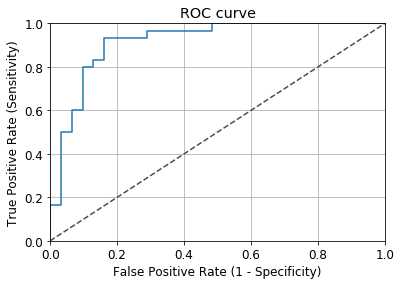

In [44]:
from sklearn.metrics import roc_curve

y_pred_prob_lr = lr.predict_proba(x_test)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr)

fig_lr, ax = plt.subplots()
ax.plot(fpr_lr, tpr_lr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [45]:
#Area Under the Curve - AUC
from sklearn.metrics import auc 

auc_lr = auc(fpr_lr, tpr_lr)
print('AUC : {:.2f}'.format(auc_lr))

AUC : 0.92


In [46]:
from sklearn.model_selection import cross_val_score

cvs_lr = cross_val_score(lr, x, y, cv=10)
cvs_lr = ["%.2f"%i for i in cvs_lr]
print('Cross Validation Score: {}'.format(cvs_lr))

Cross Validation Score: ['0.87', '0.84', '0.84', '0.90', '0.87', '0.77', '0.87', '0.90', '0.72', '0.69']


In [47]:
from sklearn.metrics import classification_report

class_rep_lr = classification_report(y_test, y_pred_lr)

print(class_rep_lr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



***
# Support Vector Classification

In [48]:
from sklearn import svm
from sklearn.svm import SVC

In [49]:
svm_clf = SVC(kernel='linear', probability=True)
svm_clf.fit(x, y) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

###  Support Vector Classification - Evaluation

In [50]:
test_score_svm_clf = svm_clf.score(x_test, y_test)
train_score_svm_clf = svm_clf.score(x_train, y_train)

print('Accuracy of support vector classifier on test set: {:.2f}'.format(test_score_svm_clf))
print('Accuracy of support vector classifier on training set: {:.2f}'.format(train_score_svm_clf))

Accuracy of support vector classifier on test set: 0.85
Accuracy of support vector classifier on training set: 0.86


In [51]:
from sklearn.metrics import confusion_matrix

y_pred_svm_clf = svm_clf.predict(x_test)

confusion_matrix_svm_clf = confusion_matrix(y_test, y_pred_svm_clf, labels=[1,0])
print(confusion_matrix_svm_clf)

[[27  3]
 [ 6 25]]


In [52]:
#Calculating Sensitivity and Specificity 
sensitivity_svm_clf = confusion_matrix_svm_clf[1,1]/(confusion_matrix_svm_clf[1,1]+confusion_matrix_svm_clf[1,0])
print('Sensitivity : {:.2f}'.format(sensitivity_svm_clf))

specificity_svm_clf = confusion_matrix_svm_clf[0,0]/(confusion_matrix_svm_clf[0,0]+confusion_matrix_svm_clf[0,1])
print('Specificity : {:.2f}'.format(specificity_svm_clf))

Sensitivity : 0.81
Specificity : 0.90


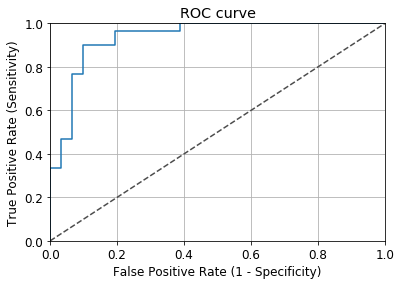

In [53]:
from sklearn.metrics import roc_curve

y_pred_prob_svm_clf = svm_clf.predict_proba(x_test)[:, 1]

fpr_svm_clf, tpr_svm_clf, thresholds_svm_clf = roc_curve(y_test, y_pred_prob_svm_clf)

fig_svm_clf, ax = plt.subplots()
ax.plot(fpr_svm_clf, tpr_svm_clf)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [54]:
#Area Under the Curve - AUC
from sklearn.metrics import auc 

auc_svm_clf = auc(fpr_svm_clf, tpr_svm_clf)
print('AUC : {:.2f}'.format(auc_svm_clf))

AUC : 0.94


In [55]:
from sklearn.model_selection import cross_val_score

cvs_svm_clf = cross_val_score(svm_clf, x, y, cv=10)
cvs_svm_clf = ["%.2f"%i for i in cvs_svm_clf]
print('Cross Validation Score: {}'.format(cvs_svm_clf))

Cross Validation Score: ['0.87', '0.81', '0.84', '0.94', '0.87', '0.73', '0.87', '0.80', '0.72', '0.76']


In [56]:
from sklearn.metrics import classification_report

class_rep_svm_clf = classification_report(y_test, y_pred_svm_clf)

print(class_rep_svm_clf)

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



# Model Comparison

In [57]:
# Score
print('Test Set:')
print('Accuracy of random forest classifier: {:.2f}'.format(test_score_rfc))
print('Accuracy of logistic regression classifier: {:.2f}'.format(test_score_lr))
print('Accuracy of support vector classifier: {:.2f}'.format(test_score_svm_clf))
print('\n')
print('Training Set:')
print('Accuracy of random forest classifier: {:.2f}'.format(train_score_rfc))
print('Accuracy of logistic regression classifier: {:.2f}'.format(train_score_lr))
print('Accuracy of support vector classifier: {:.2f}'.format(train_score_svm_clf))

Test Set:
Accuracy of random forest classifier: 0.82
Accuracy of logistic regression classifier: 0.85
Accuracy of support vector classifier: 0.85


Training Set:
Accuracy of random forest classifier: 0.90
Accuracy of logistic regression classifier: 0.85
Accuracy of support vector classifier: 0.86


In [58]:
# Confusion Matrix
print('Random forest classifier:')
print(confusion_matrix_rfc)
print('\n')
print('Logistic regression classifier:')
print(confusion_matrix_lr)
print('\n')
print('Support vector classifier:')
print(confusion_matrix_svm_clf)

Random forest classifier:
[[27  3]
 [ 8 23]]


Logistic regression classifier:
[[28  2]
 [ 7 24]]


Support vector classifier:
[[27  3]
 [ 6 25]]


In [59]:
# Sensitivity and Specificity 
print('Sensitivity:')
print('Random forest classifier: {:.2f}'.format(sensitivity_rfc))
print('Logistic regression classifier: {:.2f}'.format(sensitivity_lr))
print('Support vector classifier: {:.2f}'.format(sensitivity_svm_clf))
print('\n')
print('Specificity:')
print('Random forest classifier: {:.2f}'.format(specificity_rfc))
print('Logistic regression classifier: {:.2f}'.format(specificity_lr))
print('Support vector classifier: {:.2f}'.format(specificity_svm_clf))

Sensitivity:
Random forest classifier: 0.74
Logistic regression classifier: 0.77
Support vector classifier: 0.81


Specificity:
Random forest classifier: 0.90
Logistic regression classifier: 0.93
Support vector classifier: 0.90


Random Forest Classifier


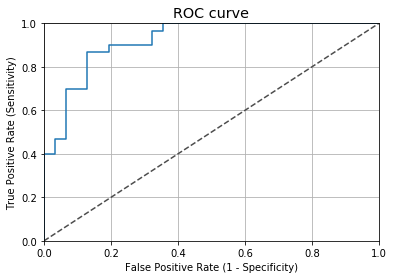

In [60]:
# ROC Curve - random forest classifier
print('Random Forest Classifier')
fig_rfc

Logistic Regression Classifier


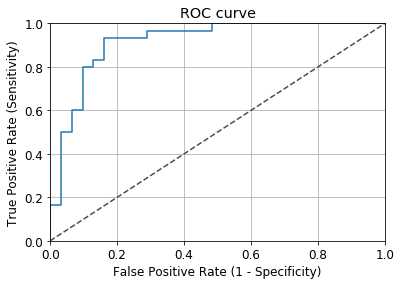

In [61]:
# ROC Curve - logistic regression classifier
print('Logistic Regression Classifier')
fig_lr

Support Vector Classifier


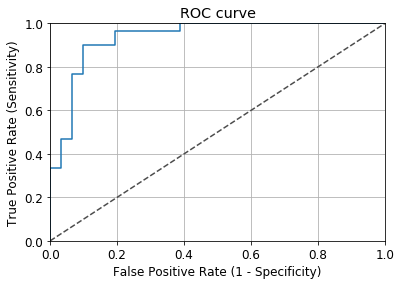

In [62]:
# ROC Curve - support vector classifier
print('Support Vector Classifier')
fig_svm_clf

In [63]:
# AUC
print('Area Under Curve - AUC:')
print('\n')
print('Random forest classifier: {:.2f}'.format(auc_rfc))
print('Logistic regression classifier: {:.2f}'.format(auc_lr))
print('Support vector classifier: {:.2f}'.format(auc_svm_clf))

Area Under Curve - AUC:


Random forest classifier: 0.92
Logistic regression classifier: 0.92
Support vector classifier: 0.94


In [64]:
# Cross Validation Score

cvs_rfc = list(map(float, cvs_rfc))
cvs_lr = list(map(float, cvs_lr))
cvs_svm_clf = list(map(float, cvs_svm_clf))

print('Cross Validation Scores:')
print('\n')
print('Random forest classifier:')
print(cvs_rfc)
print('Average: {}'.format(statistics.mean(cvs_rfc)))
print('\n')
print('Logistic regression classifier:')
print(cvs_lr)
print('Average: {}'.format(statistics.mean(cvs_lr)))
print('\n')
print('Support vector classifier:')
print(cvs_svm_clf)
print('Average: {}'.format(statistics.mean(cvs_svm_clf)))

Cross Validation Scores:


Random forest classifier:
[0.9, 0.81, 0.87, 0.97, 0.87, 0.8, 0.83, 0.87, 0.76, 0.79]
Average: 0.847


Logistic regression classifier:
[0.87, 0.84, 0.84, 0.9, 0.87, 0.77, 0.87, 0.9, 0.72, 0.69]
Average: 0.827


Support vector classifier:
[0.87, 0.81, 0.84, 0.94, 0.87, 0.73, 0.87, 0.8, 0.72, 0.76]
Average: 0.821


In [65]:
# Classification Report
print('Classification Reports:')
print('\n')
print('Random forest classifier:')
print(class_rep_rfc)
print('\n')
print('Logistic regression classifier:')
print(class_rep_lr)
print('\n')
print('Support vector classifier:')
print(class_rep_svm_clf)

Classification Reports:


Random forest classifier:
              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

   micro avg       0.82      0.82      0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



Logistic regression classifier:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

   micro avg       0.85      0.85      0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



Support vector classifier:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        31
           1       0.82      0.90      0.86        30

   micro avg       0.85      0.85      0.85        61
   macro avg 

> * The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.
* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
* The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.
    * The support is the number of occurrences of each class in y_test.

***
# Feature Importance

In [66]:
#defining the coeficients of the model
lr_coef = lr.coef_[0]
lr_int = lr.intercept_
x_names = x.columns

In [67]:
#creating dataframe that matches coeficients to corresonding feature of the model. 
lr_feature = pd.DataFrame({'Feature':x_names, 'Importance': lr_coef})
#creating another column that normalizes the feature importance (0 means low chance of 1 meaning high chance of importance)
lr_feature['Normalize'] = (lr_feature['Importance']-lr_feature['Importance'].max())/(lr_feature['Importance'].min()-lr_feature['Importance'].max())

In [68]:
lr_feature = lr_feature.round(2)
lr_feature.sort_values(by =['Normalize'], ascending=False)

,Feature,Importance,Normalize
8,chest_pain_type_asymptomatic,-0.90,1.00
24,thalassemia_reversable defect,-0.79,0.94
5,num_major_vessels,-0.70,0.88
20,st_slope_flat,-0.61,0.83
7,sex_male,-0.54,0.78
18,exercise_induced_angina_yes,-0.51,0.76
4,st_depression,-0.46,0.74
9,chest_pain_type_atypical angina,-0.44,0.73
15,rest_ecg_left ventricular hypertrophy,-0.40,0.70
14,rest_ecg_ST-T wave abnormality,-0.14,0.54


In [69]:
#lr_feature[['Feature','Normalize']].sort_values(by =['Normalize'], ascending=False)

***
# Shortcomings of Model

* Does not separate the signal from noise well, given many features.
* Does not automatically learn feature interaction.
* Does not have the highest sensitivity score out of the three models.
* Some features might be biased and negatively impact the model.